In [62]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from ur import ur

In [63]:
def remap(inputs):
    
    image0 = inputs[0]
    image1 = inputs[1]
    u = inputs[2]
    v = inputs[3]
    
    x, y = np.meshgrid(np.arange(image1.shape[1]), np.arange(image1.shape[0]))
    x = np.float32(x)
    y = np.float32(y)
    # image1 = cv.remap(image1, x-u, y-v, interpolation = 4)
    
    return cv.remap(image1, x-u, y-v, interpolation = 4)

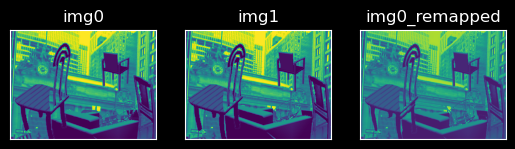

remaped!
model has loaded!
sigma has got!!


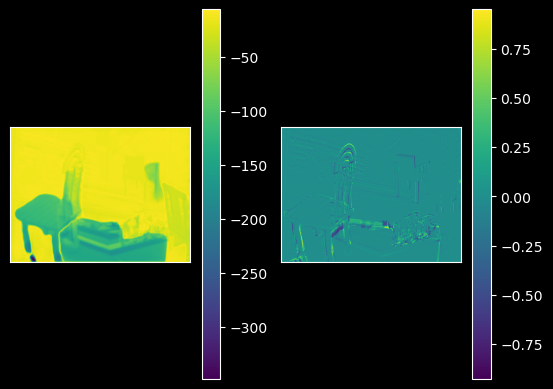

In [64]:
# 加载数据
data_path = '/home/panding/code/UR/data-chair/00801_img1.npy'
data = np.load(data_path)
data = data[:4]
img0 = data[0]
img1 = data[1]
img0_remapped = remap(data)
data_tensor = torch.from_numpy(data)

plt.figure()

plt.subplot(131)
plt.imshow(img0)
plt.title('img0')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(img1)
plt.title('img1')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(img0_remapped)
plt.title('img0_remapped')
plt.xticks([])
plt.yticks([])

plt.show()

model_path = '/home/panding/code/UR/UR/model1.pt'
my_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

res = ur(data_tensor, model_path, my_device)
res = res.cpu().detach().numpy()
plt.figure()
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(res)
plt.colorbar()
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(img0_remapped-img0)
plt.colorbar()
plt.show()



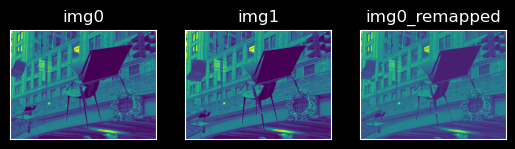

remaped!
model has loaded!
sigma has got!!


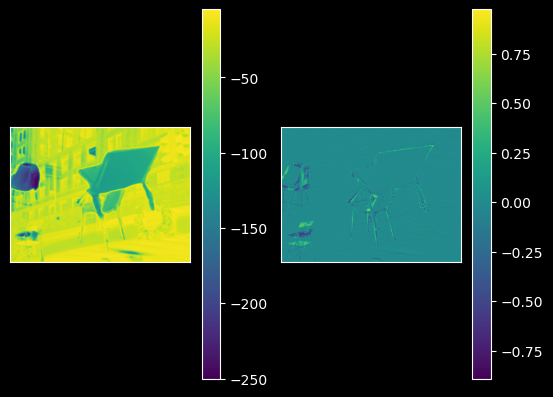

In [65]:
# 加载数据
data_path = '/home/panding/code/UR/data-chair/00803_img1.npy'
data = np.load(data_path)
data = data[:4]
img0 = data[0]
img1 = data[1]
img0_remapped = remap(data)
data_tensor = torch.from_numpy(data)

plt.figure()

plt.subplot(131)
plt.imshow(img0)
plt.title('img0')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(img1)
plt.title('img1')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(img0_remapped)
plt.title('img0_remapped')
plt.xticks([])
plt.yticks([])

plt.show()

model_path = '/home/panding/code/UR/UR/model1.pt'
my_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

res = ur(data_tensor, model_path, my_device)
res = res.cpu().detach().numpy()
plt.figure()
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(res)
plt.colorbar()
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(img0_remapped-img0)
plt.colorbar()
plt.show()

